In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from rec_model import microgrid

In [4]:
CONFIG_PATH = os.path.join("..", "config", "sample_setup.yaml")

In [5]:
microgrid.setup(config=CONFIG_PATH)

In [9]:
microgrid.get_components()

[{'id': 'load_0', 'type': 'LoadModule'},
 {'id': 'renewable_0', 'type': 'RenewableModule'},
 {'id': 'balancing_0', 'type': 'UnbalancedEnergyModule'},
 {'id': 'grid_0', 'type': 'GridModule'},
 {'id': 'battery_0', 'type': 'BatteryModule'},
 {'id': 'battery_1', 'type': 'BatteryModule'}]

In [11]:
microgrid.get_actions()

{'grid': [None], 'battery': [None, None]}

In [13]:
microgrid.reset()

In [15]:
microgrid.get_status()

{'load': [{'load_current': -23.68}],
 'renewable': [{'renewable_current': 0}],
 'balancing': [{}],
 'grid': [{'import_price_current': 0.2243,
   'export_price_current': 0.1247,
   'co2_per_kwh_current': 0.2547,
   'grid_status_current': 1.0}],
 'battery': [{'soc': 0.5, 'current_charge': 25.0},
  {'soc': 0.5, 'current_charge': 50.0}]}

In [17]:
control = {
    "battery" : [10.0, 10.0],
    "grid": [3.0]
}
result = microgrid.run(control)

In [19]:
result

{'observation': {'load': [0.6397612619013784],
  'grid': [array([0.69905956, 0.89694656, 0.25242342, 0.        ])],
  'battery': [array([0.3, 0.3]), array([0.4, 0.4])],
  'renewable': [0.0],
  'balancing': [array([], dtype=float64)]},
 'reward': -17.472899999999996,
 'done': False,
 'info': {'load': [('absorbed_energy', 23.68)],
  'grid': [('provided_energy', 3.0), ('co2_production', 0.7641)],
  'battery': [('provided_energy', 9.5), ('provided_energy', 9.5)],
  'renewable': [('provided_energy', 0), ('curtailment', 0)],
  'balancing': [('provided_energy', 1.6799999999999997)]}}

In [21]:
microgrid.get_status()

{'load': [{'load_current': -25.35}],
 'renewable': [{'renewable_current': 0}],
 'balancing': [{}],
 'grid': [{'import_price_current': 0.2259,
   'export_price_current': 0.1306,
   'co2_per_kwh_current': 0.2356,
   'grid_status_current': 1.0}],
 'battery': [{'soc': 0.3, 'current_charge': 15.0},
  {'soc': 0.4, 'current_charge': 40.0}]}

In [9]:
microgrid.get_totals()['totals'].columns

MultiIndex([(  'balance', 'controllable_absorbed_from_microgrid'),
            (  'balance',   'controllable_provided_to_microgrid'),
            (  'balance',        'fixed_absorbed_from_microgrid'),
            (  'balance',          'fixed_provided_to_microgrid'),
            (  'balance',      'overall_absorbed_from_microgrid'),
            (  'balance',        'overall_provided_to_microgrid'),
            (  'balance',                               'reward'),
            ('balancing',                            'loss_load'),
            ('balancing',                       'overgeneration'),
            ('balancing',                               'reward'),
            (  'battery',                        'charge_amount'),
            (  'battery',                       'current_charge'),
            (  'battery',                     'discharge_amount'),
            (  'battery',                               'reward'),
            (  'battery',                                  'so

In [10]:
df = microgrid.get_log()

In [11]:
df.columns

MultiIndex([(     'load',           0,                               'reward'),
            (     'load',           0,                             'load_met'),
            (     'load',           0,                         'load_current'),
            ('renewable',           0,                               'reward'),
            ('renewable',           0,                          'curtailment'),
            ('renewable',           0,                       'renewable_used'),
            ('renewable',           0,                    'renewable_current'),
            ('balancing',           0,                               'reward'),
            ('balancing',           0,                            'loss_load'),
            ('balancing',           0,                       'overgeneration'),
            (     'grid',           0,                               'reward'),
            (     'grid',           0,                       'co2_production'),
            (     'grid',           0,  

In [12]:
result

{'observation': {'load': [0.6397612619013784],
  'grid': [array([0.69905956, 0.89694656, 0.25242342, 0.        ])],
  'battery': [array([0.5, 0.5])],
  'renewable': [0.0],
  'balancing': [array([], dtype=float64)]},
 'reward': -236.8,
 'done': False,
 'info': {'load': [('absorbed_energy', 23.68)],
  'grid': [('provided_energy', 0.0), ('co2_production', 0.0)],
  'battery': [('provided_energy', 0.0)],
  'renewable': [('provided_energy', 0), ('curtailment', 0)],
  'balancing': [('provided_energy', 23.68)]}}

In [13]:
microgrid.get_status()

{'load': [{'load_current': -25.35}],
 'renewable': [{'renewable_current': 0}],
 'balancing': [{}],
 'grid': [{'import_price_current': 0.2259,
   'export_price_current': 0.1306,
   'co2_per_kwh_current': 0.2356,
   'grid_status_current': 1.0}],
 'battery': [{'soc': 0.5, 'current_charge': 25.0}]}

In [14]:
control = {
    "battery" : [0.0],
    "grid": [0.3]
}
result = microgrid.run(control)

In [15]:
result

{'observation': {'load': [0.6609350575529345],
  'grid': [array([0.7468652 , 0.86005089, 0.13454827, 0.        ])],
  'battery': [array([0.5, 0.5])],
  'renewable': [0.0],
  'balancing': [array([], dtype=float64)]},
 'reward': -250.56777,
 'done': False,
 'info': {'load': [('absorbed_energy', 25.35)],
  'grid': [('provided_energy', 0.3), ('co2_production', 0.07067999999999999)],
  'battery': [('provided_energy', 0.0)],
  'renewable': [('provided_energy', 0), ('curtailment', 0)],
  'balancing': [('provided_energy', 25.05)]}}

In [16]:
microgrid.get_status()

{'load': [{'load_current': -23.86}],
 'renewable': [{'renewable_current': 0}],
 'balancing': [{}],
 'grid': [{'import_price_current': 0.232,
   'export_price_current': 0.1277,
   'co2_per_kwh_current': 0.2052,
   'grid_status_current': 1.0}],
 'battery': [{'soc': 0.5, 'current_charge': 25.0}]}

In [17]:
control = {
    "battery" : [0.7],
    "grid": [0.0]
}
result = microgrid.run(control)
result

{'observation': {'load': [0.47605513713230074],
  'grid': [array([0.85109718, 0.82188295, 0.11477317, 0.        ])],
  'battery': [array([0.48526316, 0.48526316])],
  'renewable': [0.0],
  'balancing': [array([], dtype=float64)]},
 'reward': -231.6,
 'done': False,
 'info': {'load': [('absorbed_energy', 23.86)],
  'grid': [('provided_energy', 0.0), ('co2_production', 0.0)],
  'battery': [('provided_energy', 0.7)],
  'renewable': [('provided_energy', 0), ('curtailment', 0)],
  'balancing': [('provided_energy', 23.16)]}}

In [18]:
microgrid.get_status()

{'load': [{'load_current': -36.87}],
 'renewable': [{'renewable_current': 0}],
 'balancing': [{}],
 'grid': [{'import_price_current': 0.2453,
   'export_price_current': 0.1247,
   'co2_per_kwh_current': 0.2001,
   'grid_status_current': 1.0}],
 'battery': [{'soc': 0.48526315789473684,
   'current_charge': 24.263157894736842}]}

In [19]:
log = microgrid.get_log()

<Axes: >

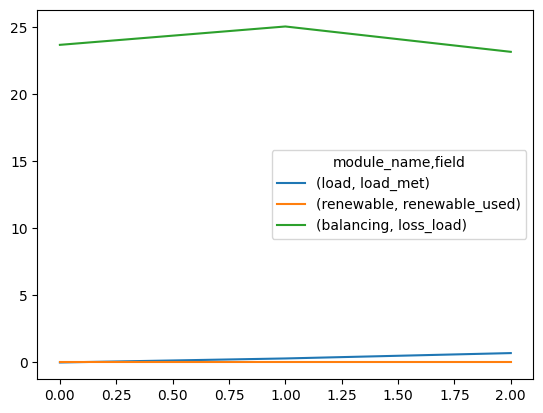

In [20]:
log[[('load', 0, 'load_met'),
               ('renewable', 0, 'renewable_used'),
               ('balancing', 0, 'loss_load')]].droplevel(axis=1, level=1).plot()

In [43]:
microgrid.microgrid.get_empty_action()

{'grid': [None], 'battery': [None]}

In [51]:
microgrid.microgrid.modules.grid[0].max_act

100.0

In [53]:
microgrid.microgrid.modules.grid[0].min_act

-100.0

In [63]:
microgrid.microgrid.modules.battery[0].max_act

9.5

In [65]:
microgrid.microgrid.modules.battery[0].min_act

-10.526315789473685

In [81]:
soc = microgrid.microgrid.modules.battery[0].soc
soc

0.48526315789473684

In [87]:
min = microgrid.microgrid.modules.battery[0].min_capacity
min

0

In [89]:
max = microgrid.microgrid.modules.battery[0].max_capacity
max

50

In [95]:
max_chg = microgrid.microgrid.modules.battery[0].max_charge
max_chg

10

In [97]:
max_dchg = microgrid.microgrid.modules.battery[0].max_discharge
max_dchg

10

In [101]:
eff = microgrid.microgrid.modules.battery[0].efficiency
eff

0.95

In [93]:
max - soc * max

25.736842105263158

In [103]:
max_dchg / eff

10.526315789473685

In [107]:
max_chg * eff

9.5